In [104]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the JSON data
with open("nes_results_dense_100k.json", "r") as f:
    results_data = json.load(f)

# Convert to a DataFrame
data = pd.DataFrame(results_data)
data.head()


,Population,Dimension,Generation,Error,Time (s),Errors,Parameters History,Convergence
0,50,2,100000,0.000002,328.559440,"[1.249466061592102, 1.2288600206375122, 1.2182...","[[0.2553534507751465, -0.6024458408355713], [0...","[-45.130313873291016, -38.18280029296875, -35...."
1,500,2,100000,0.000290,336.345016,"[1.0860447883605957, 1.0860447883605957, 0.918...","[[0.01865839958190918, -0.18150532245635986], ...","[-4.27009916305542, -11.186748504638672, -1.82..."
2,50,5,100000,0.000013,330.562200,"[0.6456902623176575, 0.6300705075263977, 0.624...","[[1.618669033050537, 1.0834944248199463, 0.101...","[-484.4629821777344, -412.69793701171875, -391..."
3,500,5,100000,0.000344,331.288393,"[0.5505263805389404, 0.5141845941543579, 0.517...","[[1.195814609527588, 1.0296814441680908, 0.202...","[-152.58416748046875, -11.847724914550781, -3...."
4,50,10,100000,0.000322,321.265609,"[1.3760371208190918, 1.3617477416992188, 1.355...","[[0.29969072341918945, -0.3980109691619873, -0...","[-585.0794067382812, -525.408447265625, -499.8..."


In [105]:
# Extract unique dimensions and populations
dims, pops = data['Dimension'].unique(), data['Population'].unique()

# Initialize dictionaries to store convergence and error data
convergence_data = {}
error_data = {}

# Populate the convergence and error dictionaries
for dim in dims:
    for pop in pops:
        subset = data[(data['Dimension'] == dim) & (data['Population'] == pop)]
        convergence_data[(dim, pop)] = subset['Convergence'].values[0]  # No need for .tolist() since it's already a list
        error_data[(dim, pop)] = subset['Errors'].values[0]             # No need for .tolist() since it's already a list

# Check the first 10 values to verify the content
for (dim, pop), convergence in convergence_data.items():
    print(f"Dim: {dim}, Pop: {pop}, Convergence Data: {convergence[:10]}")  # Print first 10 values


Dim: 2, Pop: 50, Convergence Data: [-45.130313873291016, -38.18280029296875, -35.12181854248047, -33.48624038696289, -33.003990173339844, -32.784271240234375, -32.70457458496094, -32.66152572631836, -32.62727737426758, -32.60746383666992]
Dim: 2, Pop: 500, Convergence Data: [-4.27009916305542, -11.186748504638672, -1.8287063837051392, -0.8496752381324768, -0.82666015625, -0.7865985631942749, -0.775180459022522, -0.7695332169532776, -0.7661530375480652, -0.7634797692298889]
Dim: 5, Pop: 50, Convergence Data: [-484.4629821777344, -412.69793701171875, -391.54022216796875, -379.93206787109375, -376.01202392578125, -374.3200378417969, -373.8114318847656, -373.4371337890625, -373.1953430175781, -373.04107666015625]
Dim: 5, Pop: 500, Convergence Data: [-152.58416748046875, -11.847724914550781, -3.720468521118164, -1.6931084394454956, -1.0116479396820068, -0.857978105545044, -0.7944152355194092, -0.7677595019340515, -0.7532700300216675, -0.7429539561271667]
Dim: 10, Pop: 50, Convergence Data: 

In [106]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data for plotting
data = []
for (dim, pop), convergence in convergence_data.items():
    convergence = [-val for val in convergence]
    data.extend({"Iterations": i + 1, "Objective Value": value, "Dimension": dim, "Population": pop}
                for i, value in enumerate(convergence))

# Convert list to DataFrame
df = pd.DataFrame(data)


Below threshold 0.001 at generation 2278.0 for 2 and 50
Below threshold 0.001 at generation 3709.0 for 5 and 50
Below threshold 0.001 at generation 5530.0 for 10 and 50
Below threshold 0.001 at generation 10814.0 for 25 and 50
Below threshold 0.001 at generation 2210.0 for 2 and 500
Below threshold 0.001 at generation 3615.0 for 5 and 500
Below threshold 0.001 at generation 4974.0 for 10 and 500
Below threshold 0.001 at generation 7480.0 for 25 and 500


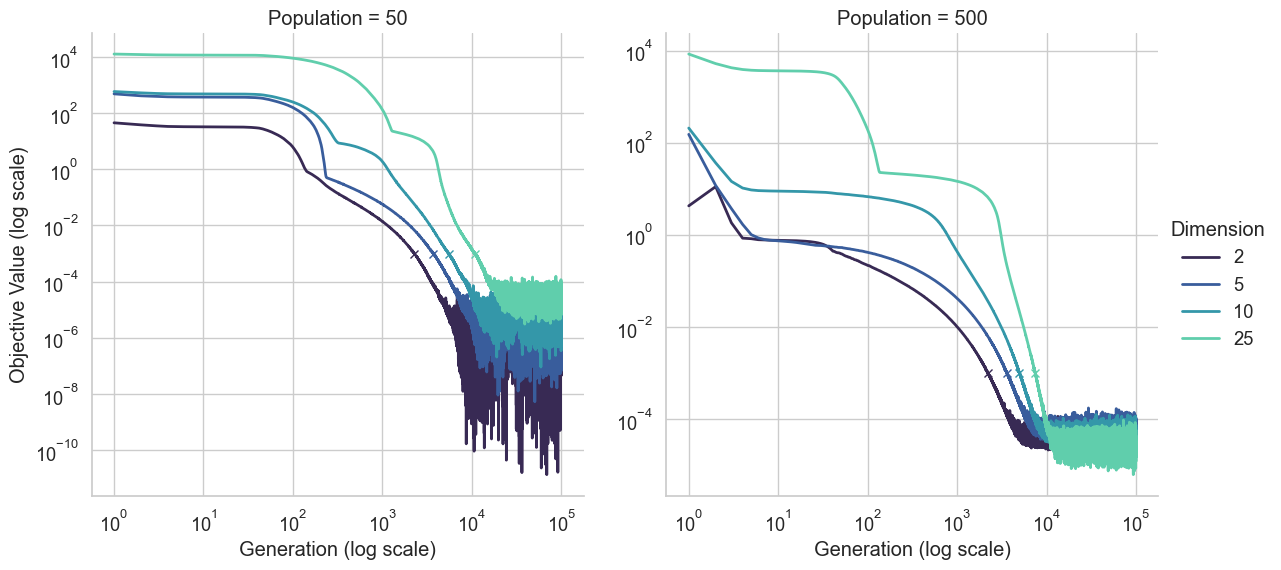

In [107]:

# Set context and style
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Plot with FacetGrid for population separation
g = sns.FacetGrid(df, col="Population", hue="Dimension", height=6, aspect=1, palette="mako", col_wrap=2, sharey=False)
g.map(sns.lineplot, "Iterations", "Objective Value", linewidth=2.0)

# Customize plot aesthetics
g.set(yscale="log", xscale="log")
g.set_axis_labels("Generation (log scale)", "Objective Value (log scale)")
g.set_titles("Population = {col_name}")
g.add_legend(title="Dimension")

# Add markers for error threshold of 1e-4
threshold = 1e-3 # Convert threshold to percentage 
for ax, (pop, dim_data) in zip(g.axes.flat, df.groupby("Population")):
    for dim, data in dim_data.groupby("Dimension"):
        below_threshold = data[data["Objective Value"] < threshold]
        if not below_threshold.empty:
            first_below_threshold = below_threshold.iloc[0]
            print(f'Below threshold {threshold} at generation {first_below_threshold["Iterations"]} for {dim} and {pop}')
            
            # Get the line color by finding the lines on the current axis
            for line in ax.get_lines():
                if line.get_label() == str(dim):  # Check if the label matches the current dimension
                    line_color = line.get_color()  # Get the color of the line
                    break
            
            # Plot marker with the same color as the line
            ax.plot(first_below_threshold["Iterations"], first_below_threshold["Objective Value"],
                    marker="x", color=line_color, markersize=6, label=f"{dim} (1e-3 marker)")
            

# Add a main title and show the plot
plt.subplots_adjust(top=0.9)
plt.show()


Below threshold 0.1-percent at generation 6980.0 for 2 and 50
Below threshold 0.1-percent at generation 10408.0 for 5 and 50
Below threshold 0.1-percent at generation 12483.0 for 10 and 50
Below threshold 0.1-percent at generation 22062.0 for 25 and 50
Below threshold 0.1-percent at generation 9804.0 for 2 and 500
Below threshold 0.1-percent at generation 9730.0 for 5 and 500
Below threshold 0.1-percent at generation 10546.0 for 10 and 500
Below threshold 0.1-percent at generation 12140.0 for 25 and 500


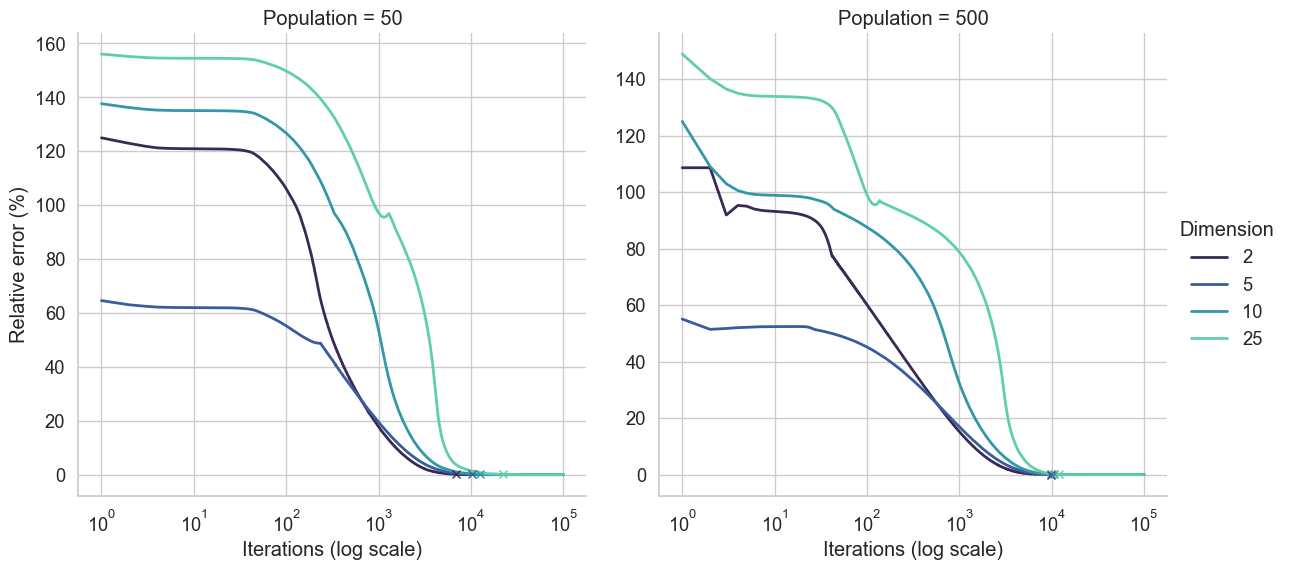

In [108]:
# Prepare the data for plotting
data = []
for (dim, pop), error in error_data.items():
    data.extend({"Iterations": i + 1, "Error": value, "Dimension": dim, "Population": pop}
                for i, value in enumerate(error))

# Convert list to DataFrame
df = pd.DataFrame(data)
df['Error'] = df['Error'] * 100  # Convert error to percentage

# Set context and style
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Plot with FacetGrid for population separation
g = sns.FacetGrid(df, col="Population", hue="Dimension", height=6, aspect=1, palette="mako", col_wrap=2, sharey=False)
g.map(sns.lineplot, "Iterations", "Error", linewidth=2.0)

# Customize plot aesthetics
g.set(yscale="linear", xscale="log")
g.set_axis_labels("Iterations (log scale)", "Relative error (%)")
g.set_titles("Population = {col_name}")
g.add_legend(title="Dimension")

# Add markers for error threshold of 1e-3
threshold = 1e-3 * 100  # Convert threshold to percentage
for ax, (pop, dim_data) in zip(g.axes.flat, df.groupby("Population")):
    for dim, data in dim_data.groupby("Dimension"):
        below_threshold = data[data["Error"] < threshold]
        if not below_threshold.empty:
            first_below_threshold = below_threshold.iloc[0]
            print(f'Below threshold {threshold}-percent at generation {first_below_threshold["Iterations"]} for {dim} and {pop}')
            
            # Get the line color by finding the lines on the current axis
            for line in ax.get_lines():
                if line.get_label() == str(dim):  # Check if the label matches the current dimension
                    line_color = line.get_color()  # Get the color of the line
                    break
            
            # Plot marker with the same color as the line
            ax.plot(first_below_threshold["Iterations"], first_below_threshold["Error"],
                    marker="x", color=line_color, markersize=6, label=f"{dim} (1e-3 marker)")

# Add a main title and show the plot
plt.subplots_adjust(top=0.9)
plt.show()
